# Ex2 - Getting and Knowing your Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [69]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [70]:
chipo = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')

### Step 4. See the first 10 entries

In [71]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. What is the number of observations in the dataset?

In [72]:
# Solution 1
len(chipo)


4622

In [73]:
# Solution 2



### Step 6. What is the number of columns in the dataset?

In [74]:
len(list(chipo))

5

### Step 7. Print the name of all the columns.

In [75]:
list(chipo)

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']

### Step 8. How is the dataset indexed?

In [76]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### Step 9. Which was the most-ordered item? 

In [77]:
q = chipo.groupby(['item_name'])['quantity'].sum().sort_values(ascending=False)
df_q = pd.DataFrame(q)
df_q.reset_index(inplace=True)
df_q['item_name'][0]


'Chicken Bowl'

In [78]:
d = {key:value for key, value in q.items() }
print([k for k,v in d.items() if v == max(d.values())][0])


Chicken Bowl


In [79]:
df_q


,item_name,quantity
0,Chicken Bowl,761
1,Chicken Burrito,591
2,Chips and Guacamole,506
3,Steak Burrito,386
4,Canned Soft Drink,351
5,Chips,230
6,Steak Bowl,221
7,Bottled Water,211
8,Chips and Fresh Tomato Salsa,130
9,Canned Soda,126


### Step 10. For the most-ordered item, how many items were ordered?

In [80]:
df_q['quantity'][0]

761

### Step 11. What was the most ordered item in the choice_description column?

In [81]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [82]:
cd = chipo.groupby('choice_description')['quantity'].sum().sort_values(ascending=False)
df_cd = pd.DataFrame(cd)
df_cd.reset_index(inplace=True)
# df_cd.head()
df_cd['choice_description'][0]

'[Diet Coke]'

### Step 12. How many items were orderd in total?

In [83]:
chipo['quantity'].sum()

4972

### Step 13. Turn the item price into a float

#### Step 13.a. Check the item price type

In [84]:
chipo['item_price'].dtype

dtype('O')

#### Step 13.b. Create a lambda function and change the type of item price

In [85]:
chipo['item_price'] = chipo['item_price'].apply( lambda x: float(x[1:-1]))
chipo.head(2)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39


#### Step 13.c. Check the item price type

In [86]:
chipo['item_price'].dtype

dtype('float64')

### Step 14. How much was the revenue for the period in the dataset?

In [87]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


In [88]:
# chipo[chipo['quantity'] * chipo['item_price']]
revenue = (chipo['item_price'] * chipo['quantity']).sum()
revenue


39237.02

### Step 15. How many orders were made in the period?

In [89]:
len(chipo['order_id'].unique())

1834

### Step 16. What is the average revenue amount per order?

In [90]:
chipo.item_price.dtype

dtype('float64')

In [91]:
# Solution 1
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
av = chipo.groupby(by='order_id').sum()
av = np.round(av['revenue'].mean(),2)
av




21.39

In [92]:
# Solution 2

revenue = 39237.02
order_count = 1834
av = revenue/order_count
av = np.round(av,2)
av

21.39

### Step 17. How many different items are sold?

In [93]:
len(chipo['item_name'].unique())

50

**VISUALIZATIONS**

In [101]:
import matplotlib.pyplot as plt

df_q['quantity'].describe()


count     50.000000
mean      99.440000
std      159.306297
min        1.000000
25%        9.250000
50%       38.000000
75%      106.750000
max      761.000000
Name: quantity, dtype: float64

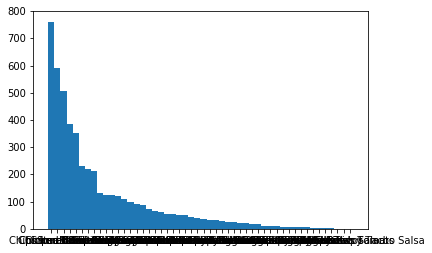

<Figure size 3600x5040 with 0 Axes>

In [113]:
# plt.bar(x=df_q['item_name'], y=df_q['quantity'], s='o', alpha=0.7)
plt.bar(x=df_q['item_name'],height=df_q['quantity'], width = 1)
plt.figure(figsize=[50, 70], facecolor='Green')
plt.show()